In [1]:
from Utilities.orginizers import LearningData
from sklearn.model_selection import KFold, cross_val_score
from itertools import product
from functools import partial
from random import sample
from multiprocessing import Pool
from Utilities import clustering 
import matplotlib.pyplot as plt
import Utilities
from pandas import DataFrame

ld = LearningData()
sc = clustering.StrengthCalc()

In [3]:
min_numbers = [1,2,5,10,20,30,50]
max_numbers = [325,300,270,250]
steps = [1,2,5,10,20]
tresholds = [0.1,0.15,0.2,0.25,0.3,0.35,0.4]

stock_names = sample(ld.get_stock_names(), 5)
market_names = sample(ld.get_market_names(), 5)

def run_model(tup):
    stock, market, min_number, max_number, step, threshold = tup
    stren = sc.get_strength(stock, market, min_number=min_number, max_number=max_number, step=step, threshold=threshold)
    n_clusters = round((max_number-min_number)/step)
    return (stock, market, n_clusters, threshold, stren)

models = list(map(run_model, product(stock_names, market_names, min_numbers, max_numbers, steps, tresholds)))

results = DataFrame(models,columns=('stock', 'market', 'n_clusters', 'threshold', 'strength'))

In [4]:
results.var()

n_clusters    9256.950488
threshold        0.010000
strength         0.185975
dtype: float64

In [5]:
results.describe()

,min_number,max_number,step,threshold,strength
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,16.857143,286.250000,7.600000,0.550000,0.141645
std,16.651682,28.587172,6.945668,0.170787,0.460705
min,1.000000,250.000000,1.000000,0.300000,-0.620000
25%,2.000000,265.000000,2.000000,0.400000,-0.120000
50%,10.000000,285.000000,5.000000,0.550000,0.020000
75%,30.000000,306.250000,10.000000,0.700000,0.130000
max,50.000000,325.000000,20.000000,0.800000,1.000000


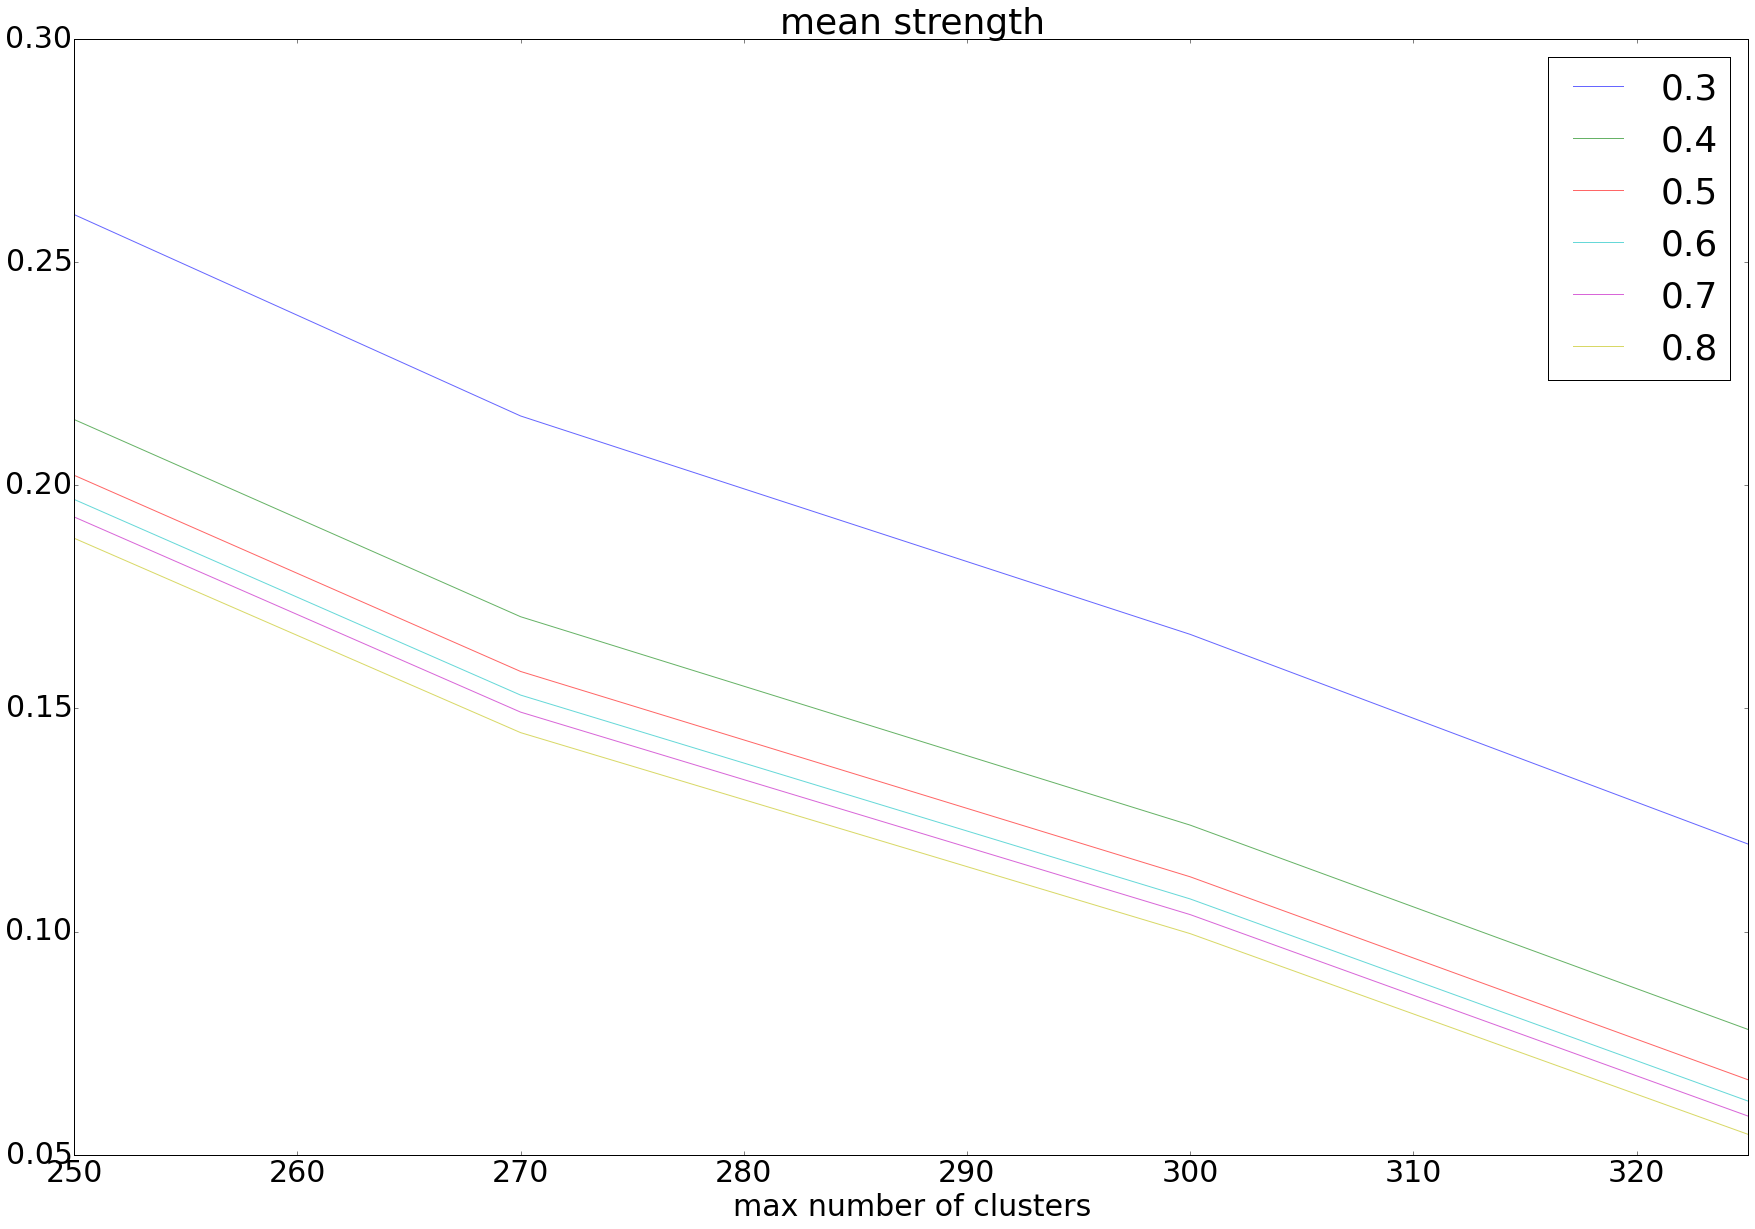

In [14]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('threshold'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('max_number').agg('mean')['strength'].plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('max number of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )

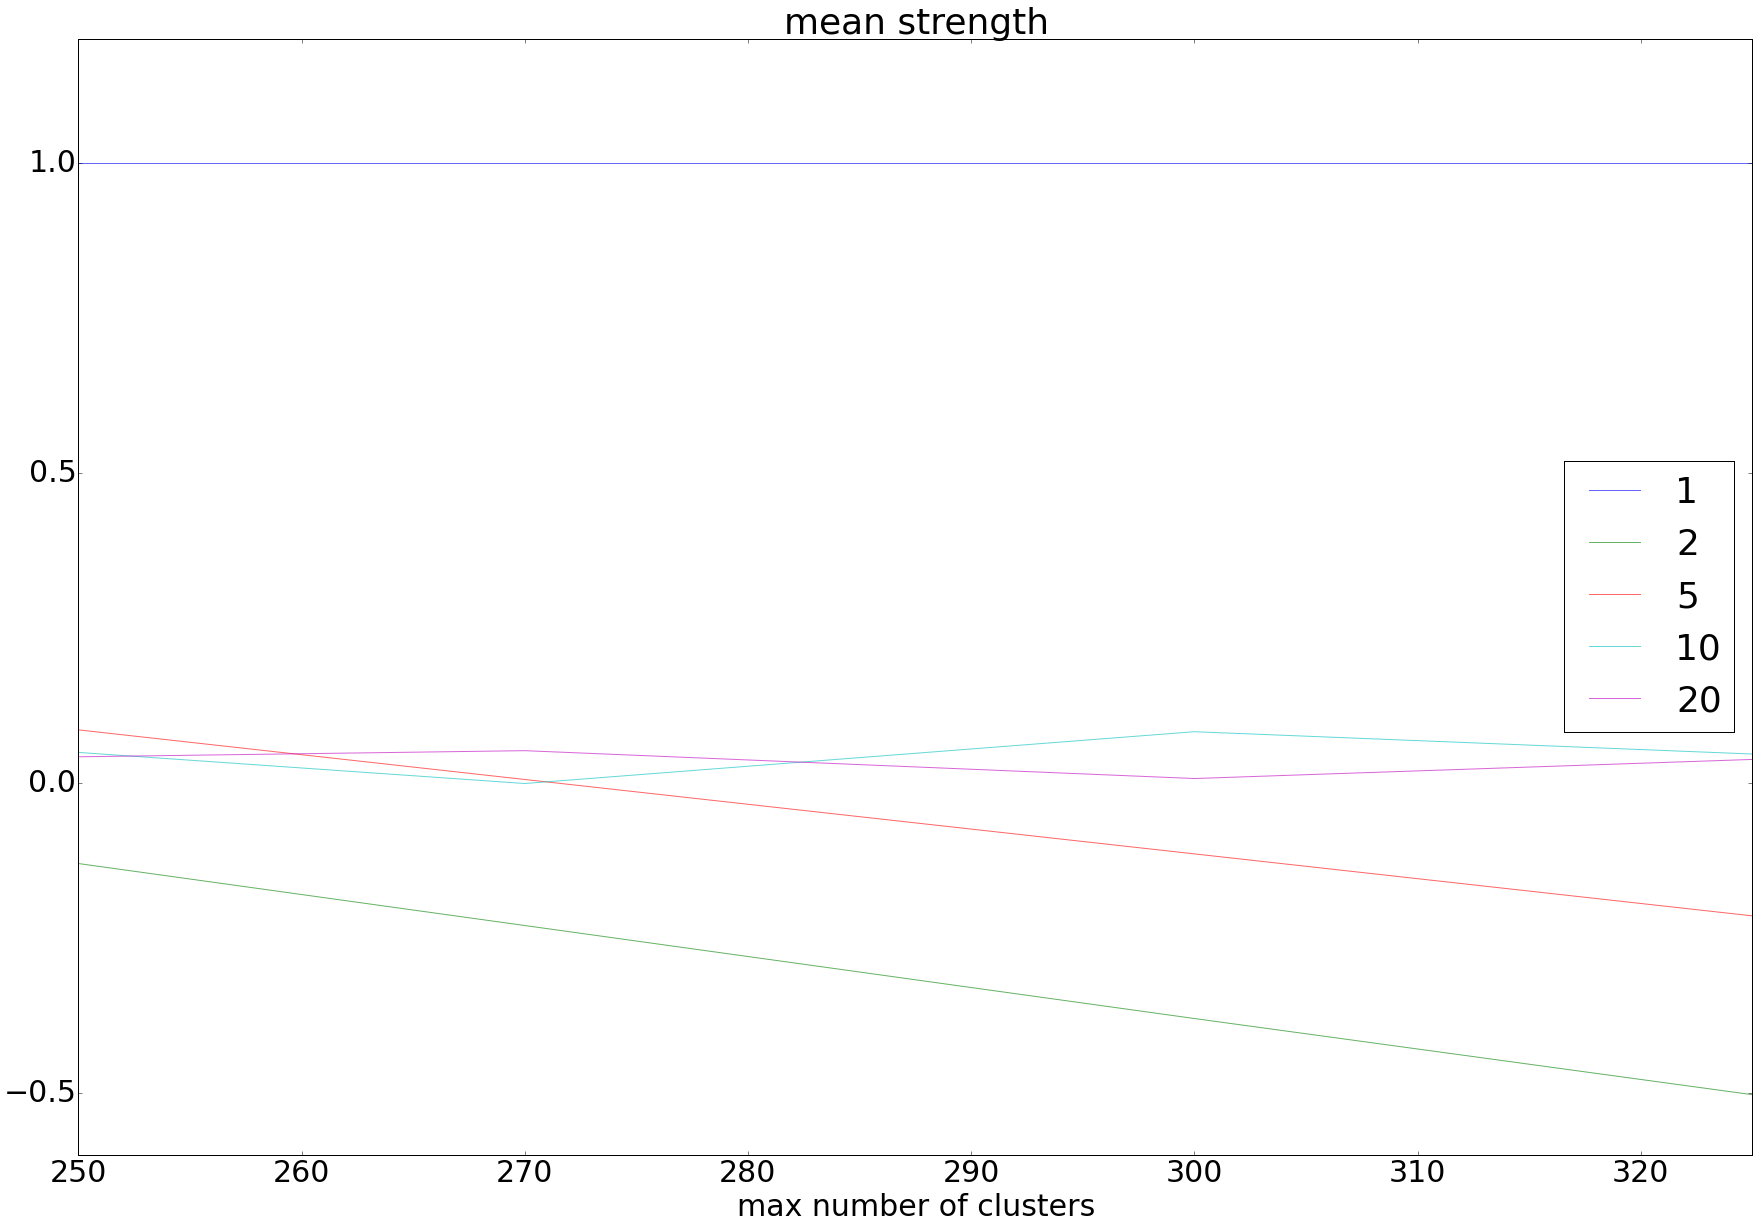

In [16]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('step'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('max_number').agg('mean')['strength'].plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('max number of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )

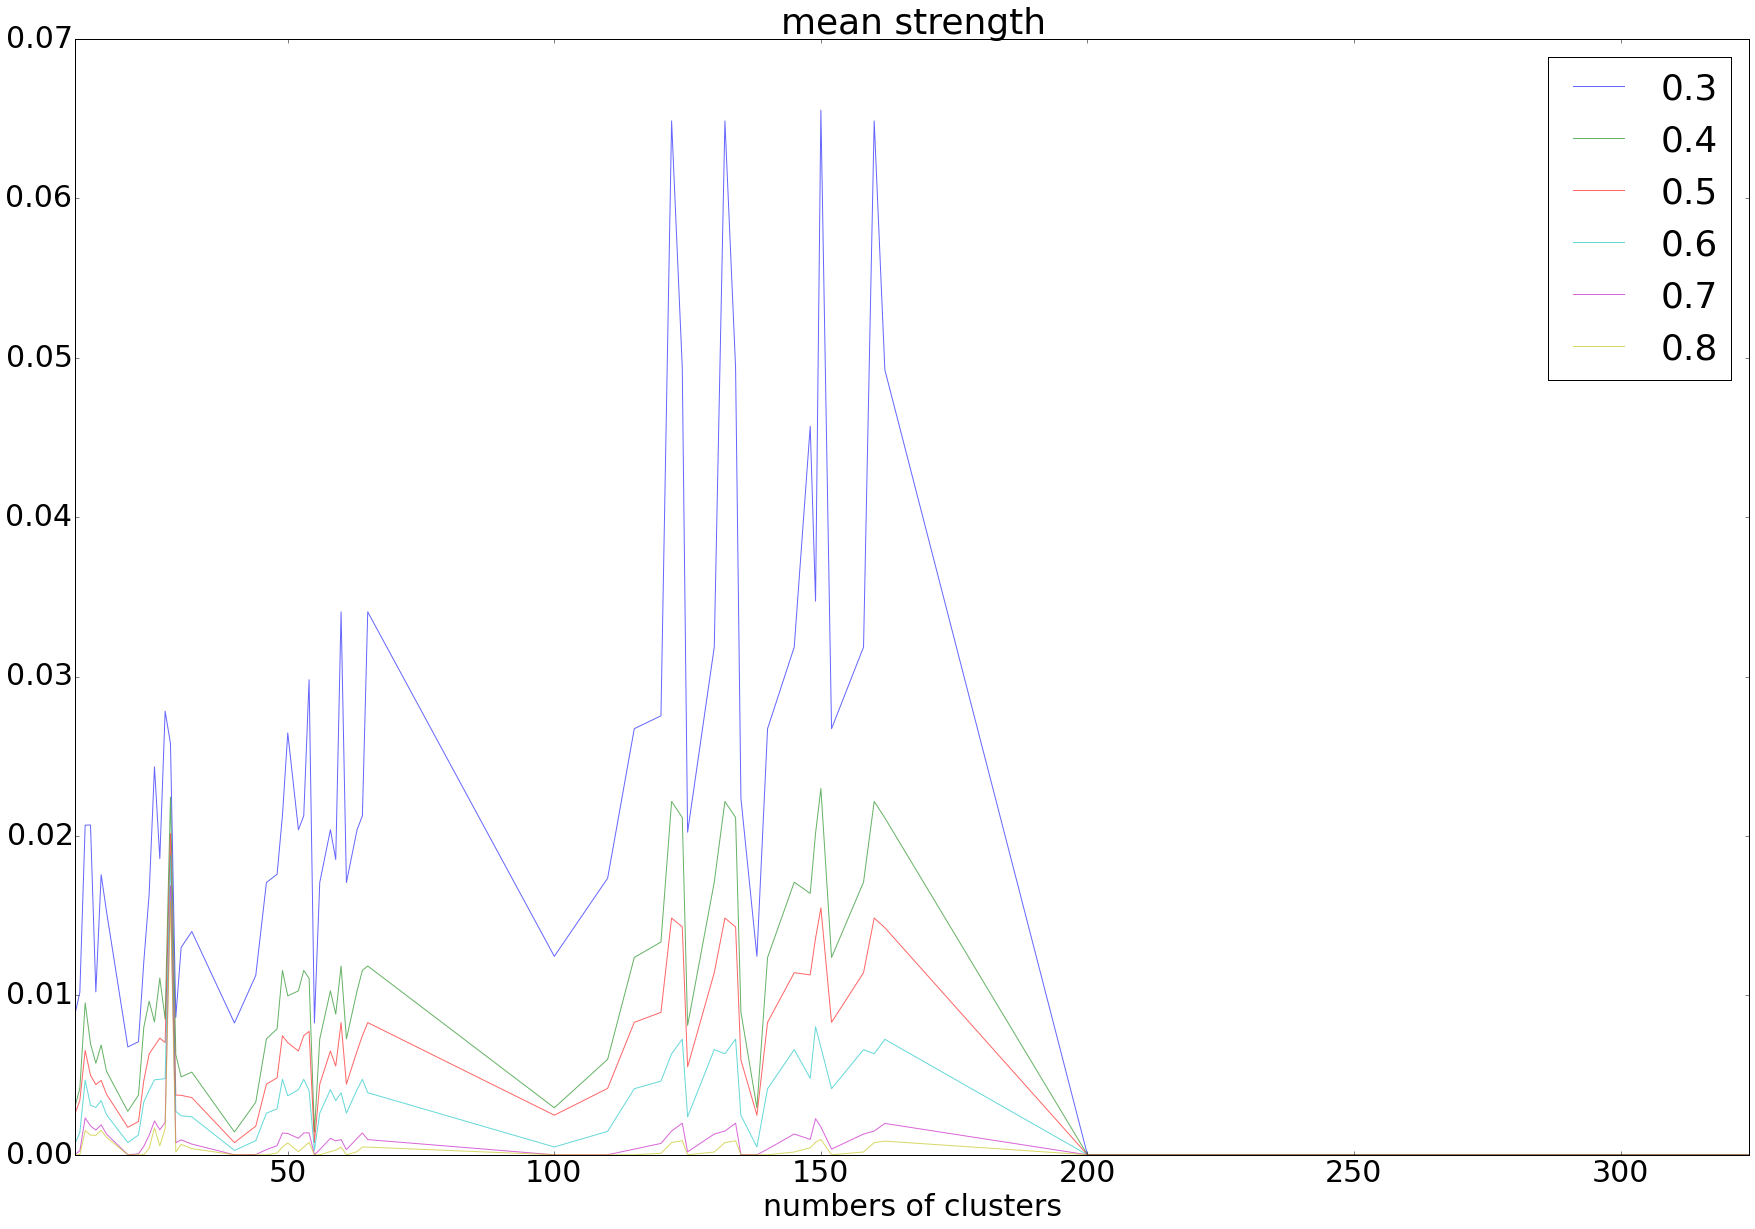

In [19]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('threshold'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('n_clusters').var().strength.plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('numbers of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )

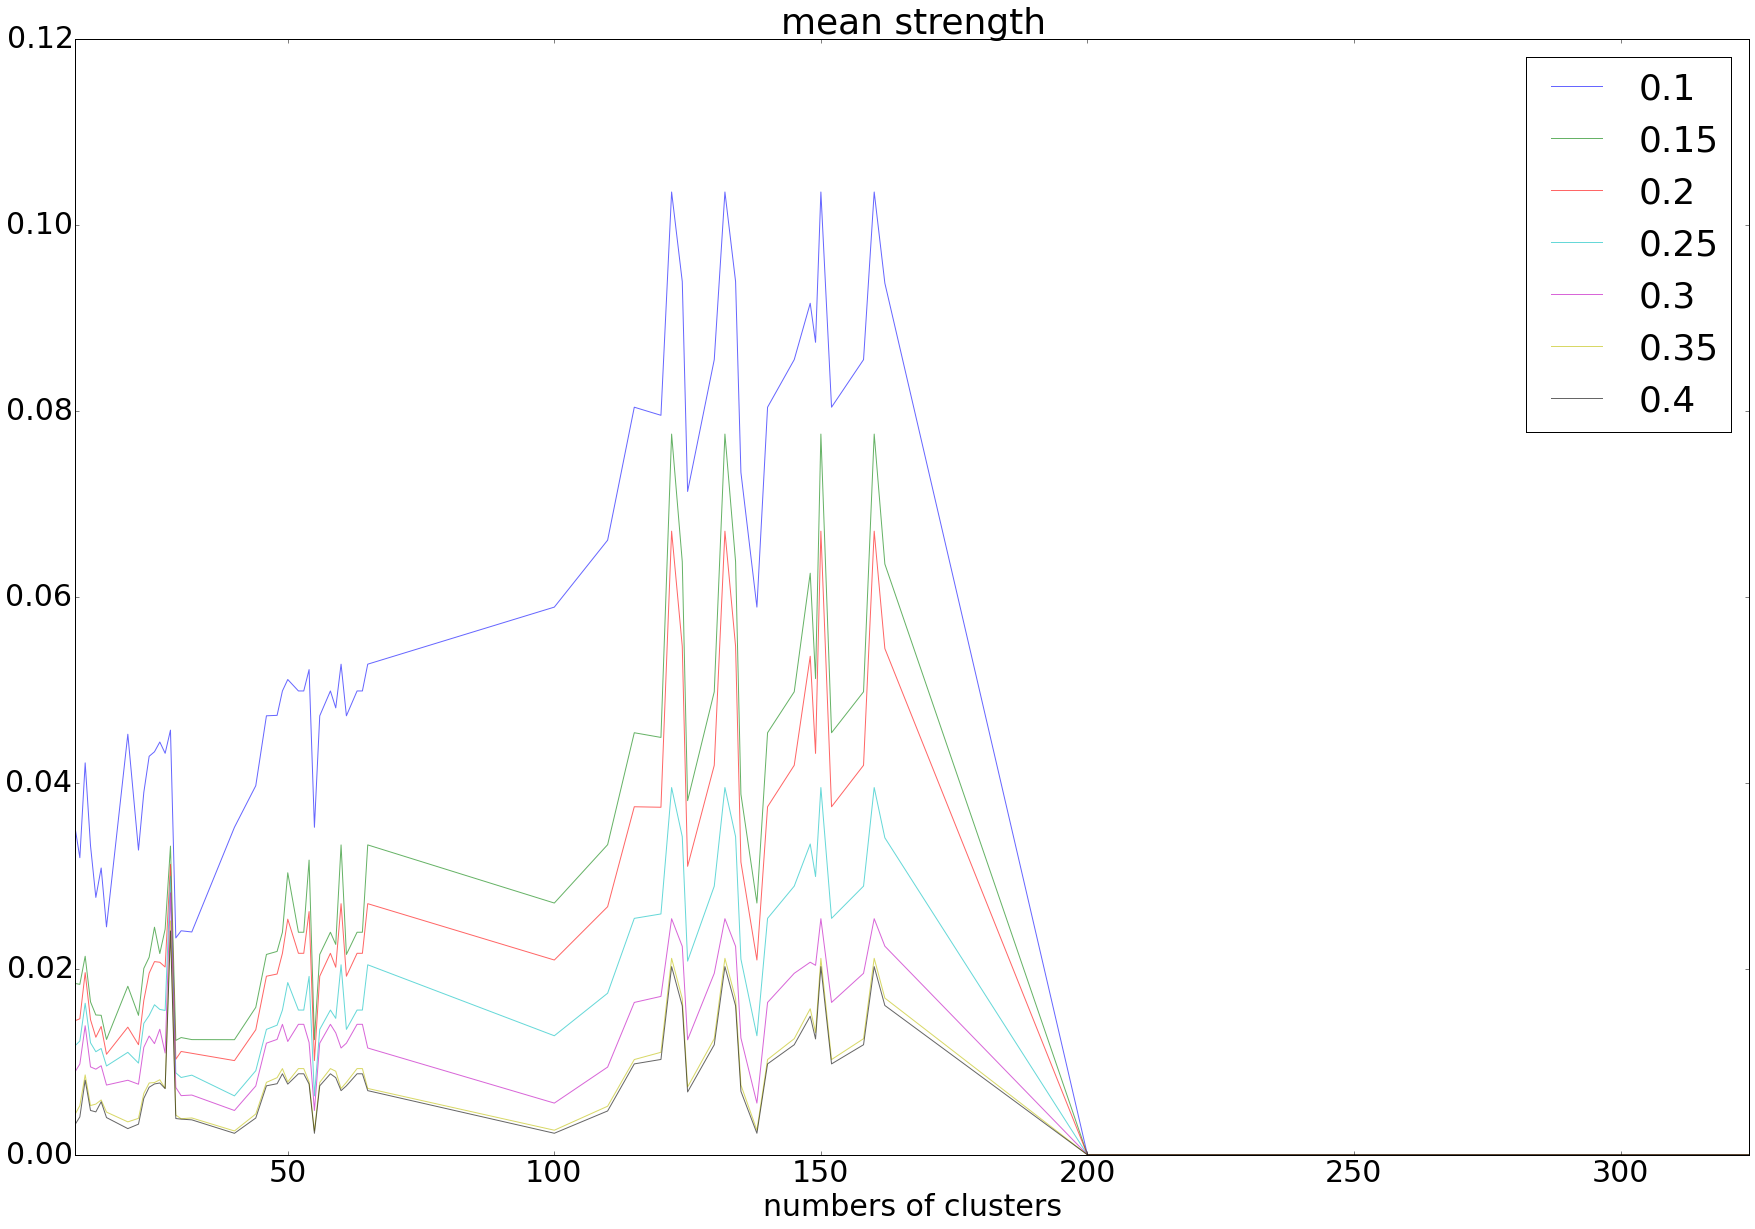

In [5]:
import numpy as np

%matplotlib inline

plt.rc('font', size=30)
fig = plt.figure(figsize=(30, 20))
alpha = 0.6

ax1 = plt.subplot2grid((1,1), (0,0))
for name, group in results.groupby('threshold'):
    # since we are counting values it makes sense to regularize the counts
    group.replace(np.nan, 12).groupby('n_clusters').var().strength.plot(kind='line', label=name, alpha=alpha)
ax1.set_xlabel('numbers of clusters')
plt.legend(loc='best')
ax1.set_title("mean strength" )